In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install scikit-learn==1.1.3


The "Boston Housing Dataset" is a famous dataset commonly used in machine learning and statistics for regression analysis tasks. It was originally collected in the 1970s by David Harrison and Daniel Rubinfeld from the University of Massachusetts, Boston. The dataset is often used for practicing and testing regression algorithms, especially for predicting house prices based on various features.

Here is a brief description of the Boston Housing Dataset:

Dataset Content:
The dataset consists of 506 rows (samples) and 13 columns (features). Each row represents information about a different suburb in Boston, and each column represents a different aspect or feature of the suburbs. The dataset includes both numerical and categorical variables. The columns are as follows:

#CRIM: Per capita crime rate by town.
#ZN: Proportion of residential land zoned for large plots.
#INDUS: Proportion of non-retail business acres per town.
#CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
#NOX: Nitrogen oxide concentration (parts per 10 million).
#RM: Average number of rooms per dwelling.
#AGE: Proportion of owner-occupied units built before 1940.
#DIS: Weighted distance to employment centers.
#RAD: Index of accessibility to radial highways.
#TAX: Property tax rate (in thousands of dollars).
#PTRATIO: Pupil-teacher ratio by town.
#B: Proportion of residents of African American descent.
#LSTAT: Percentage of lower status population.

#Target Variable:
The target variable in this dataset is the median value of owner-occupied homes (MEDV), which represents the median price of houses in thousands of dollars.

Use Cases:
The Boston Housing Dataset is often used for regression tasks, where the goal is to predict the median house price (MEDV) based on the features provided. Researchers and machine learning practitioners use this dataset to test and evaluate regression algorithms, study the relationships between different features and house prices, and explore various regression techniques.

This dataset has been a valuable resource for teaching, learning, and researching regression analysis and predictive modeling techniques in the field of machine learning and statistics. It's readily available in many machine learning libraries and repositories, making it easily accessible for experimentation and analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

The Boston dataset contains features about various aspects of houses in Boston and their corresponding prices

In [ ]:
# Load the Boston Housing dataset
boston = load_boston()
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data['PRICE'] = boston.target

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# Overview of the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634 

In [ ]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


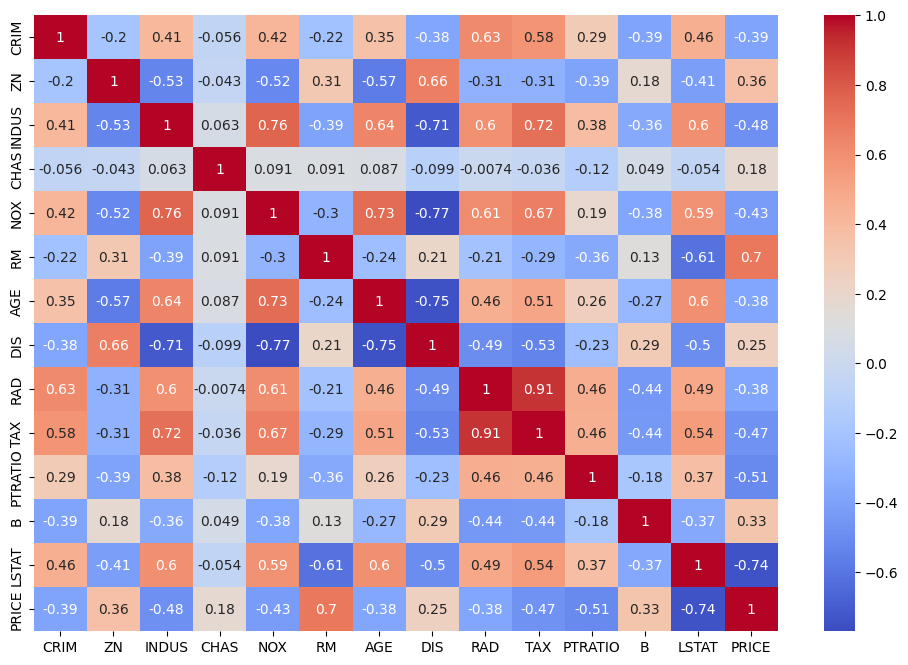

In [ ]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

From the correlation heatmap and boxplots, you can identify which features are highly correlated with the target variable (PRICE) and if there are any potential outliers that might need to be handled.

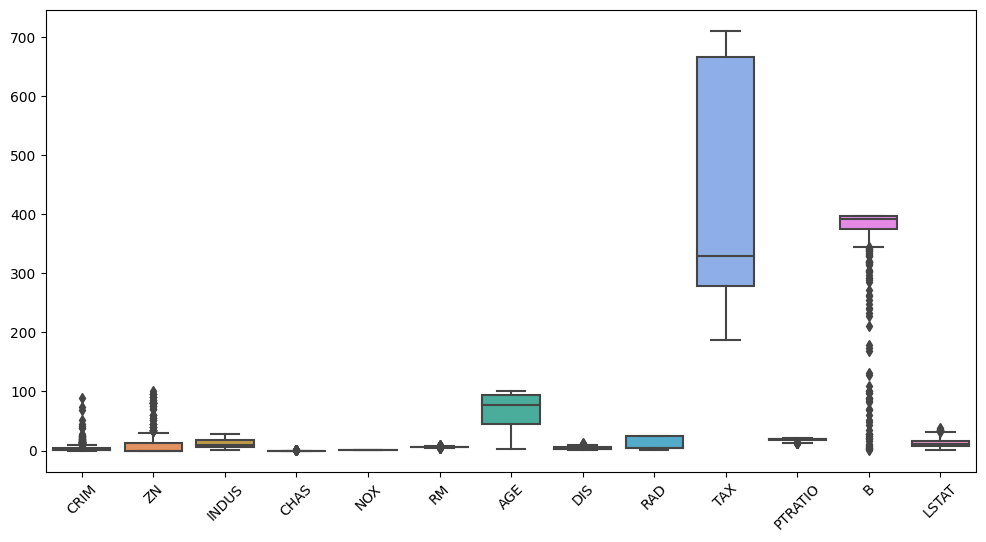

In [ ]:
# Outliers detection and handling
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop('PRICE', axis=1))
plt.xticks(rotation=45)
plt.show()

# **DATA PREPROCESSING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Address missing values
missing_values = data.isnull().sum()  # Check for missing values
print(missing_values)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [ ]:
# There are no missing values in this dataset, but if there were, you would handle them here

# Convert categorical variables (if any, but not in this dataset)
# Normalize or scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('PRICE', axis=1))
scaled_data = pd.DataFrame(data=scaled_features, columns=data.columns[:-1])
scaled_data['PRICE'] = data['PRICE']

## **Model Building**

Linear Regression is chosen as the model because it's a simple and interpretable algorithm, which aligns with the later task of interpretation.

In [ ]:
from sklearn.linear_model import LinearRegression

# Partition the data into training and test sets
X = scaled_data.drop('PRICE', axis=1)
y = scaled_data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Model Evaluation and Interpretation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 24.291119474973517
R-squared: 0.668759493535632


In [ ]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)


    Feature  Coefficient
5        RM     3.115718
8       RAD     2.282785
11        B     1.126499
3      CHAS     0.706532
1        ZN     0.701556
2     INDUS     0.276752
6       AGE    -0.177060
0      CRIM    -0.971494
9       TAX    -1.792605
10  PTRATIO    -1.979954
4       NOX    -1.991430
7       DIS    -3.045771
12    LSTAT    -3.628149


The Mean Squared Error and R-squared values give you an idea of how well the model is performing. The coefficients of the features in the linear regression model tell you how much the price changes for a one-unit change in each feature while keeping other features constant.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Adding polynomial features for non-linear relationships
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


Adding polynomial features can capture non-linear relationships between features and the target variable, which might improve the model's performance.

# **FEATURE SELECTION**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Feature selection using Random Forest
rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold='median')
X_train_selected = rf_selector.fit_transform(X_train_poly, y_train)
X_test_selected = rf_selector.transform(X_test_poly)


Feature selection helps to focus on the most relevant features and improve model efficiency. Here, we use a Random Forest regressor to select important features

# **COMPLEX MODELS**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)




RandomForestRegressor(random_state=42)

In [ ]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_selected, y_train)



GradientBoostingRegressor(random_state=42)

In [ ]:
# Multi-layer Perceptron (Neural Network) Regressor
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train_selected, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:
# Evaluating models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

rf_mse, rf_r2 = evaluate_model(rf_model, X_test_selected, y_test)
gb_mse, gb_r2 = evaluate_model(gb_model, X_test_selected, y_test)
nn_mse, nn_r2 = evaluate_model(nn_model, X_test_selected, y_test)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R-squared:", rf_r2)
print("Gradient Boosting - Mean Squared Error:", gb_mse)
print("Gradient Boosting - R-squared:", gb_r2)
print("Neural Network - Mean Squared Error:", nn_mse)
print("Neural Network - R-squared:", nn_r2)


Random Forest - Mean Squared Error: 11.312539362745092
Random Forest - R-squared: 0.8457390458363028
Gradient Boosting - Mean Squared Error: 9.919623607277853
Gradient Boosting - R-squared: 0.8647332350822337
Neural Network - Mean Squared Error: 17.175623851468284
Neural Network - R-squared: 0.7657883841350611





- **Mean Squared Error (MSE)**: Lower MSE values indicate better predictive performance, as it measures the average squared difference between predicted and actual values.

- **R-squared (R2)**: R-squared measures the proportion of the variance in the dependent variable (house prices) that is predictable from the independent variables (features). Higher R2 values (closer to 1) indicate that the model explains a larger portion of the variance.

Interpretation of the results:

- If one have multiple models and one has significantly lower MSE and higher R2 compared to the others, it's likely the best-performing model.

- If two models have similar MSE and R2, you might consider other factors like model complexity, training time, and ease of interpretation to make a decision.

